# **Project Name** - NETFLIX EDA

**Project Type** - EDA

**Contribution** - Individual

# **Project Summary:**

This project centers on clustering Netflix movies and TV shows using unsupervised machine learning techniques on Microsoft Azure. The dataset, sourced from Flixable and covering content as of 2019, includes both TV shows and movies available on Netflix. An exciting aspect of the project is its intent to enrich the Netflix data by integrating external sources—like IMDB ratings and Rotten Tomatoes—to derive deeper insights into content categorization and audience reception.

# **Problem Statement**

The dataset reveals a notable shift in Netflix's content strategy: while the number of TV shows has nearly tripled since 2010, the number of movies has decreased by over 2000 titles. This raises several critical issues:

**Content Evolution:** What are the implications of a growing TV show library versus a shrinking movie offering?

**Regional Variability:** How does the type of content differ across countries?

**Feature Clustering:** (optional) Can unsupervised learning techniques effectively group similar content based on text-based features, and what insights might this clustering yield?

# **Business Objective**

1) **Exploratory Data Analysis:** Dive deep into the dataset to identify structural patterns, trends, and anomalies within Netflix's content offerings.

2) **Regional Content Analysis:** Determine what types of content are available in different countries to inform tailored content strategies and regional engagements.

3) **Content Strategy Evaluation:** Analyze whether Netflix is consciously pivoting towards TV shows over movies and to what extent this evolution aligns with its broader business strategy.

4) **Clustering for Insights: (optional)** Implement clustering algorithms to group similar content based on textual features. This will help in categorizing content effectively, uncovering latent themes, and possibly guiding decisions on future content investments.

# **Let's Dive!!**

### Checking Data

In [1]:
# Required modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import random
import re
import collections
import unicodedata
from wordcloud import WordCloud
import plotly.graph_objects as go
import io
import base64
import warnings
warnings.filterwarnings('ignore')
sns.set(style='whitegrid', palette='muted', color_codes=True)

### Initial data looks

In [2]:
df = pd.read_csv("D:/Projects/Labmentix/BA/Netflix/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

In [3]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
print('Number of Rows =', df.shape[0])
print('Number of Columns =',df.shape[1])

Number of Rows = 7787
Number of Columns = 12


### Dataset information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


## **Understanding Your Variables**

In [6]:
# checking columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

#### Dataset Summary Statistics (Rounded)

In [7]:
round(df.describe(include='all'))

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.0,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.0,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.0,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.0,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.0,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.0,NaN,NaN,NaN,NaN


The **output shows** that the Netflix dataset contains 7787 unique titles—with movies dominating over TV shows—and highlights modern content (median release year around 2017) with significant diversity in fields like director, cast, and genres, though some attributes have missing data.

**show_id:** A unique identifier for each Netflix title.

**type:** Indicates whether the title is a Movie or a TV Show.

**title:** The name of the Netflix title.

**director:** The director(s) associated with the title.

**cast:** The main cast members featured in the title.

**country:** The country or countries where the title was produced.

**date_added:** The date when the title was added to Netflix.

**release_year:** The year the title was originally released.

**rating:** The content rating assigned to the title (e.g., TV-MA, PG).

**duration:** The runtime for movies (in minutes) or the number of seasons for TV shows.

**listed_in:** The genres or categories under which the title is classified.

**description:** A brief synopsis of the title's content.

#### Check Unique Values for each variable.

In [8]:
print('Unique Values in dataset:\n')
print(df.nunique())

Unique Values in dataset:

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64


#### Checking Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
print('Number of missing values in dataset =', df.isnull().sum().sum())

Number of missing values in dataset = 3631


In [10]:
# Calculate missing values for each column
missing_values = df.isnull().sum()

# Create a DataFrame for visualization
missing_df = pd.DataFrame({'Column names': missing_values.index, 'Missing Values': missing_values.values})

# Create a list of random colors
num_colors = len(missing_df)
colors = ["#" + ''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(num_colors)]

# Create a bar chart using Plotly Express with random colors and count numbers
fig = px.bar(missing_df, x='Column names', y='Missing Values', title='Missing Values in Dataset',
             color='Column names', color_discrete_sequence=colors, text='Missing Values')  # Added text for count numbers

# Customize the layout (optional)
fig.update_layout(xaxis_tickangle=-45, xaxis_title='Dataset Variables', yaxis_title='Number of Missing Values')
fig.update_traces(textposition='outside')  # Position count numbers outside the bars

# Show the plot
fig.show()

In [11]:
# If missing values are represented as something other than null
# replace them with "not_available" or appropriate placeholder
df[['type', 'title', 'director', 'cast', 'country',
    'rating', 'duration', 'listed_in', 'description']] = df[['type', 'title', 'director', 'cast', 'country',
    'rating', 'duration', 'listed_in', 'description']].fillna('Not available')


checking again the missing values

In [12]:
print(df.isnull().sum())

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         0
listed_in        0
description      0
dtype: int64


Date format in correct way

In [13]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [14]:
print(df.isnull().sum())

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      98
release_year     0
rating           0
duration         0
listed_in        0
description      0
dtype: int64


Date column filling with median

In [15]:
df['date_added'] = df['date_added'].fillna(df['date_added'].median())

checking again for all null values

In [16]:
# Calculate missing values for each column
missing_values = df.isnull().sum()

# Create a DataFrame for visualization
missing_df = pd.DataFrame({'Column names': missing_values.index, 'Missing Values': missing_values.values})

# Create a list of random colors
num_colors = len(missing_df)
colors = ["#" + ''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(num_colors)]

# Create a bar chart using Plotly Express with random colors and count numbers
fig = px.bar(missing_df, x='Column names', y='Missing Values', title='Missing Values in Dataset',
             color='Column names', color_discrete_sequence=colors, text='Missing Values')  # Added text for count numbers

# Customize the layout (optional)
fig.update_layout(xaxis_tickangle=-45, xaxis_title='Dataset Variables', yaxis_title='Number of Missing Values')
fig.update_traces(textposition='outside')  # Position count numbers outside the bars

# Show the plot
fig.show()

#### Check for Unusual Characters in all Columns

In [17]:
# Function to check for unusual characters
def check_unusual_chars(text):
    # Define a pattern for allowed characters (alphanumeric, spaces, and common punctuation)
    pattern = r"[^a-zA-Z0-9\s.,!?;:'\"()\[\]{}]"
    # Find all matches for the pattern
    matches = re.findall(pattern, str(text))  # Convert to string to handle non-string values
    # Return True if any unusual characters are found, otherwise False
    return bool(matches)

# Apply the function to all columns
for col in df.columns:
    unusual_chars_found = df[col].apply(check_unusual_chars).any()
    if unusual_chars_found:
        print(f"Unusual characters found in column: {col}")

Unusual characters found in column: title
Unusual characters found in column: director
Unusual characters found in column: cast
Unusual characters found in column: date_added
Unusual characters found in column: rating
Unusual characters found in column: listed_in
Unusual characters found in column: description


In [18]:
# Combine text from all relevant columns
all_text = ' '.join(df['title'] + ' ' + df['description'] + ' ' + df['director'] + ' ' + df['cast'] + ' ' + df['listed_in'] + ' ' + df['country'])

# Find all unusual characters
unusual_chars = re.findall(r"[^a-zA-Z0-9\s.,!?;:'\"()\[\]{}]", all_text)

# Count the frequency of each unusual character
char_counts = collections.Counter(unusual_chars)

# Create a bar chart with Plotly Express
fig = px.bar(x=list(char_counts.keys()), y=list(char_counts.values()),
             labels={'x': 'Unusual Characters', 'y': 'Frequency'},
             title="Frequency of Unusual Characters")
fig.show()

In [19]:
# Create a word cloud from the unusual characters
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(char_counts)

# Convert the word cloud image to bytes
img_bytes = io.BytesIO()
wordcloud.to_image().save(img_bytes, format='PNG')
img_bytes.seek(0)

# Encode the image bytes as base64
encoded_image = base64.b64encode(img_bytes.read()).decode('ascii')

# Display the word cloud using Plotly's Image object with the encoded image
fig = go.Figure(data=[go.Image(source='data:image/png;base64,' + encoded_image)]) # Modified line
fig.update_layout(title="Word Cloud of Unusual Characters")
fig.show()

In [20]:
pd.unique(unusual_chars)

array(['%', 'ã', 'é', '-', '&', 'á', 'ş', 'ç', 'ğ', 'ı', 'Ş', 'Ö', '—',
       'ï', 'ę', 'ł', 'ń', 'ó', 'ś', 'Ø', 'ø', '\u200b', '–', '#', '_',
       '’', 'แ', 'ผ', 'น', 'ร', '้', 'า', 'ย', 'เ', 'จ', 'ล', '่', 'ห',
       '์', '¡', 'í', 'Ç', 'ü', 'É', 'þ', 'Ó', 'Á', 'ú', 'ð', 'ö', 'Þ',
       'İ', 'Ò', 'ò', 'ū', 'Æ', 'Ü', 'ñ', '$', '“', '”', 'î', 'ą', 'ż',
       'Ł', '/', '=', '・', 'ê', 'ô', 'â', 'ë', 'ä', 'ß', 'Í', '́', 'å',
       '忍', '者', 'ハ', 'ッ', 'ト', 'リ', 'く', 'ん', 'è', 'æ', 'à', 'È', 'Ñ',
       'À', '‘', '*', '´', '²', '海', '的', '儿', '子', 'Ō', '|', 'Ṣ', 'ọ',
       'ẹ', 'ì', 'ù', 'Č', 'Ř', '반', '드', '시', '잡', '는', '다', '@', '마',
       '녀', '사', '냥', '최', '강', '전', '미', '니', '특', '공', '대', '영', '웅',
       '의', '탄', '생', '+', '„', '…', 'Ú', 'ň', 'ý', '️', '‑', 'û', 'š',
       'č', 'ć', 'õ', '¿', 'Ź', '®', 'ơ', 'ā', 'ă', 'Ż', 'đ', 'ÿ', '~',
       'Ś', 'ي', 'و', 'م', 'ا', 'ل', 'د', 'ن', 'ف', 'ع', 'ة', 'ق', 'ه',
       'ر', 'ش', 'ت', 'ب', 'ك'], dtype=object)

**Replacement**: preserve some unusual characters but replace others with their standard equivalents.

In [21]:
# Character mapping for non-standard English to standard English
char_map = {
    'é': 'e', 'è': 'e', 'ê': 'e', 'ë': 'e', 'ä': 'a', 'á': 'a', 'à': 'a', 'â': 'a',
    'í': 'i', 'ì': 'i', 'î': 'i', 'ï': 'i', 'ı': 'i',
    'ó': 'o', 'ò': 'o', 'ô': 'o', 'õ': 'o', 'ö': 'o', 'ø': 'o',
    'ú': 'u', 'ù': 'u', 'û': 'u', 'ü': 'u', 'ū': 'u',
    'ç': 'c', 'ć': 'c', 'č': 'c',
    'ş': 's', 'ś': 's', 'š': 's',
    'ñ': 'n', 'ń': 'n', 'ň': 'n',
    'ý': 'y', 'ÿ': 'y',
    'æ': 'ae', 'œ': 'oe',
    'ß': 'ss',
    'å': 'a',
    'ą': 'a', 'ã': 'a',
    'ę': 'e',
    'ł': 'l', 'ľ': 'l',
    'đ': 'd',
    'þ': 'th', 'ð': 'th',
    'ż': 'z', 'ź': 'z',
    'ř': 'r',
    'ō': 'o', 'ă': 'a', 'ā': 'a',
    'Ç': 'C', 'É': 'E', 'Á': 'A', 'Ó': 'O', 'Í': 'I', 'Ú': 'U', 'Ñ': 'N', 'À': 'A',
    'È': 'E', 'Ò': 'O', 'Ü': 'U', 'Ä': 'A', 'Ö': 'O', 'Å': 'A', 'Æ': 'AE', 'Ø': 'O',
    'Ş': 'S', 'İ': 'I', 'Þ': 'TH', 'Ł': 'L', 'Ś': 'S', 'Ž': 'Z', 'Ź': 'Z', 'Ż': 'Z',
    'Č': 'C', 'Ř': 'R', 'Ň': 'N', 'Ō': 'O'
}

def clean_and_replace(text):
    # Handle non-string values (e.g., NaN)
    if pd.isna(text):
        return text
    text = str(text)  # Convert to string
    # Normalize Unicode characters (e.g., decompose é into e + combining mark)
    normalized = unicodedata.normalize('NFKD', text)
    # Replace mapped characters and keep only standard English letters, numbers, spaces, allowed punctuation, and - &
    result = ''
    for char in normalized:
        # Get the mapped character or the original if not in map
        mapped_char = char_map.get(char, char)
        # Keep standard English letters (a-z, A-Z), numbers, spaces, allowed punctuation, -, and &
        if (mapped_char.isalnum() and mapped_char.isascii()) or mapped_char in ' .,;:!?\'"()[]{} -&':
            result += mapped_char
    return result

# Apply cleaning to all columns
columns_to_clean = ['title', 'director', 'cast', 'country', 'date_added', 'rating', 'listed_in', 'description']
for col in columns_to_clean:
    df[col] = df[col].apply(clean_and_replace)

check for unusual characters to verify

In [22]:
# Re-run your check for unusual characters to verify
def check_unusual_chars(text):
    if pd.isna(text):
        return False
    pattern = r"[^a-zA-Z0-9\s.,!?;:'\"()\[\]{}\-&]"  # Updated pattern to allow - and &
    matches = re.findall(pattern, str(text))
    return bool(matches)

for col in df.columns:
    unusual_chars_found = df[col].apply(check_unusual_chars).any()
    if unusual_chars_found:
        print(f"Unusual characters still found in column: {col}")
    else:
        print(f"No unusual characters in column: {col}")

No unusual characters in column: show_id
No unusual characters in column: type
No unusual characters in column: title
No unusual characters in column: director
No unusual characters in column: cast
No unusual characters in column: country
No unusual characters in column: date_added
No unusual characters in column: release_year
No unusual characters in column: rating
No unusual characters in column: duration
No unusual characters in column: listed_in
No unusual characters in column: description


In [23]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [24]:
df['show_id'].head(3)

0    s1
1    s2
2    s3
Name: show_id, dtype: object

In [25]:
# Remove "s" prefix and convert to integer
df['show_id'] = df['show_id'].str.replace('s', '').astype(int)

# Verify the changes
print(df['show_id'].head())  # Check the first few values
print(df['show_id'].dtype)   # Check the data type

0    1
1    2
2    3
3    4
4    5
Name: show_id, dtype: int32
int32


#### **Final standard format:** after Handled null values, missing values and unsual chars from all columns

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7787 non-null   int32         
 1   type          7787 non-null   object        
 2   title         7787 non-null   object        
 3   director      7787 non-null   object        
 4   cast          7787 non-null   object        
 5   country       7787 non-null   object        
 6   date_added    7787 non-null   datetime64[ns]
 7   release_year  7787 non-null   int64         
 8   rating        7787 non-null   object        
 9   duration      7787 non-null   object        
 10  listed_in     7787 non-null   object        
 11  description   7787 non-null   object        
dtypes: datetime64[ns](1), int32(1), int64(1), object(9)
memory usage: 699.7+ KB


In [27]:
df.shape

(7787, 12)

In [28]:
round(df.describe(include='all'))

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787.0,7787,7787,7787,7787,7787,7787,7787.0,7787,7787,7787,7787
unique,NaN,2,7778,4050,6832,682,NaN,NaN,15,216,492,7769
top,NaN,Movie,,Not available,Not available,United States,NaN,NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,NaN,5377,5,2389,718,2555,NaN,NaN,2863,1608,334,3
mean,3894.0,NaN,NaN,NaN,NaN,NaN,2019-01-08 16:42:39.342493952,2014.0,NaN,NaN,NaN,NaN
min,1.0,NaN,NaN,NaN,NaN,NaN,2008-01-01 00:00:00,1925.0,NaN,NaN,NaN,NaN
25%,1948.0,NaN,NaN,NaN,NaN,NaN,2018-02-16 00:00:00,2013.0,NaN,NaN,NaN,NaN
50%,3894.0,NaN,NaN,NaN,NaN,NaN,2019-03-15 00:00:00,2017.0,NaN,NaN,NaN,NaN
75%,5840.0,NaN,NaN,NaN,NaN,NaN,2020-01-17 12:00:00,2018.0,NaN,NaN,NaN,NaN
max,7787.0,NaN,NaN,NaN,NaN,NaN,2021-01-16 00:00:00,2021.0,NaN,NaN,NaN,NaN


#### **Outlier checks**

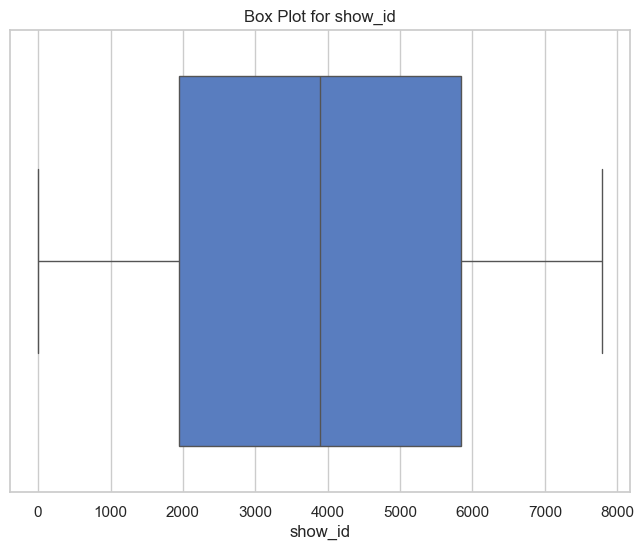

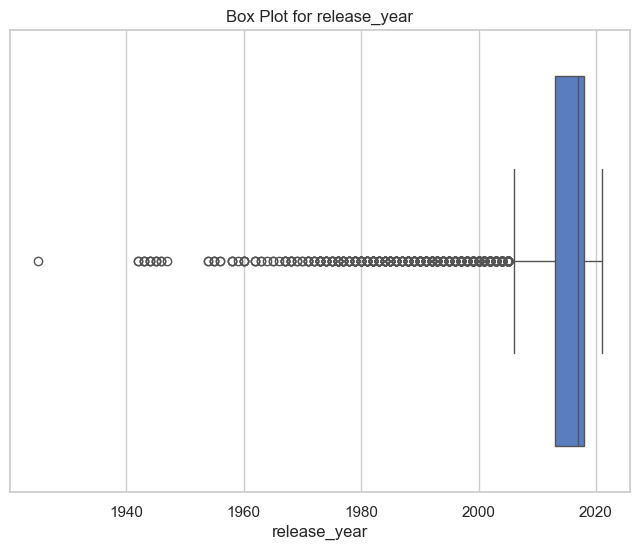

In [29]:
# Select numerical columns
numerical_cols = ['show_id', 'release_year']

# Create box plots for numerical columns
for col in numerical_cols:
    plt.figure(figsize=(8, 6))  # Adjust figure size if needed
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot for {col}')
    plt.show()

#### Visualization

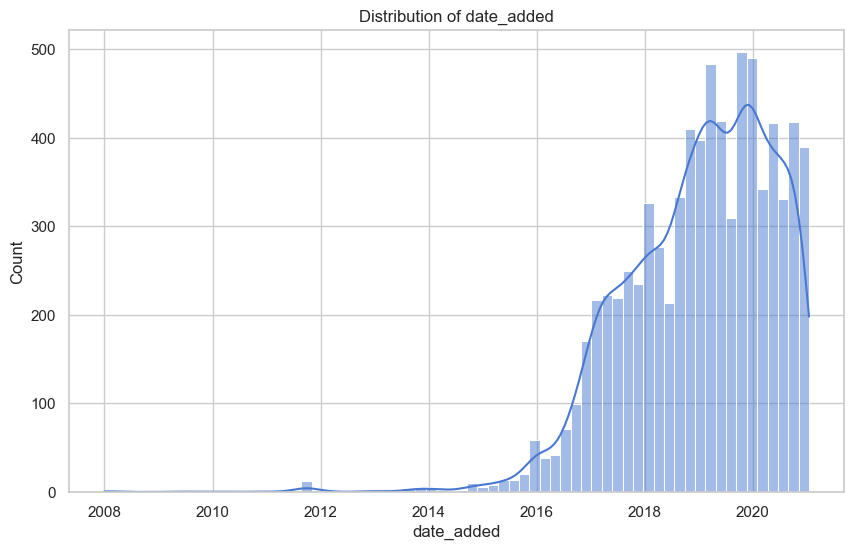

In [30]:
# Visualize distribution of 'date_added'
plt.figure(figsize=(10, 6))
sns.histplot(df['date_added'], kde=True)
plt.title('Distribution of date_added')
plt.show()

In [31]:
# Check for infrequent values in categorical columns and visualize with Plotly Express
for col in ['type', 'rating', 'duration']:  # Add other relevant columns
    value_counts = df[col].value_counts()

    # Create a list of random colors
    num_colors = len(value_counts)
    colors = ["#" + ''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(num_colors)]

    # Create a bar chart using Plotly Express with random colors and count numbers
    fig = px.bar(x=value_counts.index, y=value_counts.values,
                 labels={'x': col, 'y': 'Frequency'},
                 title=f"Value Counts for {col}",
                 color=value_counts.index, color_discrete_sequence=colors, text=value_counts.values)  # Added text for count numbers

    # Customize the layout (optional)
    fig.update_layout(xaxis_tickangle=-45, xaxis_title='Dataset Variables', yaxis_title='Count Distribution')
    fig.update_traces(textposition='outside')  # Position count numbers outside the bars

    # Show the plot
    fig.show()

There are higher count of Movies (5377) compared to TV Shows (2410), with TV-MA (2863) and TV-14 (1931) being the most common ratings, and most TV Shows having 1 season while movie durations vary widely, peaking around 90-100 minutes.

#### Understand the type content available in different **COUNTRIES**

In [32]:
# Group by country and type, then count titles
content_by_country = df.groupby(['country', 'type']).size().reset_index(name='count')

# Pivot the data to have separate columns for Movie and TV Show counts
content_by_country = content_by_country.pivot(index='country', columns='type', values='count').fillna(0).reset_index()

# Rename columns for clarity
content_by_country.columns = ['country', 'Movie_Count', 'TV_Show_Count']

# Now you can proceed with sorting and visualization
top_15_countries = content_by_country.sort_values(by=['Movie_Count', 'TV_Show_Count'], ascending=False).head(15)

# Create a bar chart using Plotly Express
fig = px.bar(top_15_countries, x='country', y=['Movie_Count', 'TV_Show_Count'],
             title='Content Type by Top 15 Countries', barmode='group',
             labels={'country': 'Country', 'value': 'Count', 'variable': 'Content Type'},
             text_auto=True,  # Display count numbers on bars
             height=800)  # Increase bar height

fig.update_traces(textfont_size=12, textangle=0, textposition='outside', cliponaxis=False)  # Adjust text properties
fig.update_layout(xaxis_tickangle=-45) # Rotate x-axis labels for better visibility
fig.show()

The **United States** leads with the highest counts—approximately **1850 movies and 705 TV** shows—indicating its dominant contribution to Netflix's content library.

**India** follows with a high movie count (**around 852**) but significantly fewer TV shows (**around 71**), suggesting a shift in content type distribution.

**Other countries** like the United Kingdom, Canada, Spain, and others show varying levels of content production.

In [33]:
# Display the content type distribution for all countries
content_by_country[['country', 'Movie_Count', 'TV_Show_Count']]

,country,Movie_Count,TV_Show_Count
0,Argentina,34.0,16.0
1,"Argentina, Brazil, France, Poland, Germany, De...",1.0,0.0
2,"Argentina, Chile",1.0,0.0
3,"Argentina, Chile, Peru",1.0,0.0
4,"Argentina, France",1.0,0.0
...,...,...,...
677,Venezuela,1.0,0.0
678,"Venezuela, Colombia",1.0,0.0
679,Vietnam,5.0,0.0
680,West Germany,1.0,0.0


#### **Genre Analysis** by Country

In [34]:
# Pre-process the genre (listed_in) column: split and explode it
df_genres = df.copy()
df_genres['listed_in'] = df_genres['listed_in'].astype(str).str.split(',')
df_genres = df_genres.explode('listed_in')
df_genres['listed_in'] = df_genres['listed_in'].str.strip()

# Group by country and genre to get counts
genre_by_country = df_genres.groupby(['country', 'listed_in']).size().reset_index(name='count')

# Optionally focus on the top 15 countries (from previous analysis)
top_country_list = top_15_countries['country'].tolist()
genre_top = genre_by_country[genre_by_country['country'].isin(top_country_list)]

# Visualize using a Treemap chart
fig_treemap = px.treemap(
    genre_top,
    path=['country', 'listed_in'],  # Hierarchical levels: country -> genre
    values='count',                  # Size of each rectangle corresponds to the count
    title="Genre Distribution in Top Countries (Treemap)"
)
fig_treemap.show()

**United States:** Dominates with a vast variety of genres, notably Dramas, Comedies, and Documentaries.

**India:** Shows strong presence in International Movies and Dramas, along with notable counts in Comedies and Thrillers.

**United Kingdom & Japan:** The UK displays a mix including Reality TV and Documentaries, while Japan has a prominent focus on Anime Series.

**Cultural Differences:** The visualization clearly illustrates how genre preferences vary across regions, highlighting distinctive cultural tastes in content consumption.

#### **Temporal Trends** by Country

In [35]:
# Extract the year from the date_added column
df['year_added'] = df['date_added'].dt.year

# Group data by year_added and country, then count titles
temporal_trends = df.groupby(['year_added', 'country']).size().reset_index(name='count')

# Filter by top countries to reduce noise
temporal_trends_top = temporal_trends[temporal_trends['country'].isin(top_country_list)]

# Create an interactive line chart
fig_trends = px.line(temporal_trends_top, x='year_added', y='count', color='country',
                     title='Yearly Content Trends in Top Countries',
                     labels={'year_added': 'Year Added', 'count': 'Number of Titles'})
fig_trends.show()

Netflix evolved from **2008 to 2020** across various countries. Notably, the United States experienced a sharp increase starting around 2016, peaking in 2018, and then a steep decline by 2020, while other countries show more gradual and modest fluctuations over the same period.

#### Content **Rating Distribution** by Country

In [36]:
# Group by country and rating; count how many titles fall in each rating category
rating_by_country = df.groupby(['country', 'rating']).size().reset_index(name='count')

# Filter for top countries only
rating_by_country_top = rating_by_country[rating_by_country['country'].isin(top_country_list)]

# Create a grouped bar chart
fig_rating = px.bar(rating_by_country_top, x='country', y='count', color='rating',
                    title='Content Rating Distribution in Top Countries',
                    labels={'country': 'Country', 'count': 'Number of Titles', 'rating': 'Rating'})
fig_rating.update_layout(xaxis_tickangle=-45)
fig_rating.show()


The **United States** leads with high counts—especially in ratings like **PG, TV-MA,** and **TV-14**—while India also shows significant numbers, particularly in **NR and TV-MA,** with other countries contributing comparatively fewer titles.

#### If Netflix has been **increasingly focusing on TV** rather than movies in recent years

In [37]:
# Step 1: Group by 'year_added' and 'type' and count entries each year
yearly_counts = df.groupby(['year_added', 'type']).size().reset_index(name='count')

# Step 2: Pivot the data so that we have separate columns for Movies and TV Shows
yearly_pivot = yearly_counts.pivot(index='year_added', columns='type', values='count').fillna(0).reset_index()
# Display the first few rows to check if the pivot operation worked as expected
print(yearly_pivot.head())

# Step 3: Plot yearly counts of Movies and TV Shows using a line chart
fig_line = px.line(
    yearly_pivot,
    x='year_added',
    y=['Movie', 'TV Show'],
    markers=True,
    title="Yearly Content Trends: Movies vs TV Shows on Netflix",
    labels={'year_added': 'Year Added', 'value': 'Count', 'variable': 'Content Type'}
)
fig_line.show()

# Step 4: Calculate the percentage of TV Shows each year for an alternative perspective
yearly_pivot['Total'] = yearly_pivot['Movie'] + yearly_pivot['TV Show']
yearly_pivot['TV_Show_Percentage'] = (yearly_pivot['TV Show'] / yearly_pivot['Total']) * 100

# Plot the percentage of TV Shows over the years
fig_percentage = px.line(
    yearly_pivot,
    x='year_added',
    y='TV_Show_Percentage',
    markers=True,
    title="Yearly Percentage of TV Shows Added to Netflix",
    labels={'year_added': 'Year Added', 'TV_Show_Percentage': 'TV Show Percentage (%)'}
)
fig_percentage.show()


type  year_added  Movie  TV Show
0           2008    1.0      1.0
1           2009    2.0      0.0
2           2010    1.0      0.0
3           2011   13.0      0.0
4           2012    3.0      0.0


Between 2008 and 2020, Netflix's content acquisition strategy shows distinct trends for movies and TV shows. Movies experienced a **dramatic surge** starting around **2015**, reaching a peak of approximately **1500 titles** in 2018 before a sharp **decline in 2020**. In contrast, TV shows—though lower in overall counts with a **peak around 400** in 2019—became increasingly significant over time. The percentage-based analysis reveals that TV show additions were minimal before 2010, then saw a sharp rise starting around 2013, **peaking near 40% in 2014**, and fluctuating through 2020, highlighting the evolving emphasis on TV content in Netflix's portfolio.

# **Final Summary Conclusion for Netflix Content Analysis Project**

**Content Evolution and Strategic Shift:**
Netflix has undergone a notable shift in its content strategy, with a marked increase in TV shows and a decline in movies. From 2008 to 2020, TV show additions nearly tripled, peaking at around 737 titles in 2019, while movies peaked at 1497 in 2018 before dropping sharply by over 2000 titles by 2020. The percentage of TV shows added rose significantly after 2010, peaking near 40% in 2014, indicating a strategic pivot towards TV content, likely to cater to evolving viewer preferences for serialized storytelling.
Regional Content Variability:

The United States dominates Netflix's content library with the highest title count (over 1800), followed by India (852 titles). Other countries like the United Kingdom, Canada, and Japan have significantly fewer titles. Content type distribution shows the U.S. and India favoring movies over TV shows, while countries like Japan and the Philippines have a more balanced mix. Ratings also vary regionally, with the U.S. and India having a high proportion of TV-MA and NR content, reflecting diverse audience preferences and regulatory environments.
Content Characteristics:

**Ratings Distribution:** TV-MA (2863 titles) and TV-14 (1931 titles) are the most common ratings, indicating a focus on mature and teen audiences. Less common ratings like NC-17 and UR suggest a limited emphasis on niche or highly restricted content.

**Duration Trends:** Most movies have durations around 90-100 minutes, while TV shows predominantly have 1-2 seasons, reflecting a preference for shorter, binge-worthy series.

**Genre Distribution:** Dramas, comedies, and international movies dominate, particularly in the U.S. and India. Genres like documentaries and kids' TV are also significant, showing Netflix's effort to cater to a broad audience.
Insights for Business Strategy:

The shift towards TV shows aligns with Netflix's broader strategy to retain subscribers through long-form, engaging content that encourages prolonged viewing. However, the sharp decline in movies suggests a need to balance its portfolio to maintain appeal for movie-focused audiences.

Regional analysis highlights opportunities for tailored content strategies. For instance, increasing movie offerings in regions like the U.S. and India, while expanding TV show libraries in markets like Japan, could enhance viewer satisfaction.

Clustering based on textual features (though optional in this analysis) could further uncover latent themes, aiding in content categorization and personalized recommendations, which are critical for user engagement.

In conclusion, Netflix's content strategy has evolved to **prioritize TV shows**, reflecting changing viewer habits, but the** decline in movies** calls for a reassessment to maintain a diverse library. Regional differences underscore the importance of localized content strategies, and understanding content characteristics can guide future investments to optimize Netflix's global appeal and subscriber retention.